Using this notebook file, one should be able to load in their data, and retrieve its statistical features.

In [1]:
# import libaries
import os
import matplotlib.pyplot as plt

# import self-written functions
from HD_statistical_functions import *

Loading in data

In [2]:
# select the data you want to analyze based on the date it was measured
date = '2_Measurems_12_05'
dir_data = os.path.join(os.getcwd(), "data") 

acc_files, acc_time, acc_data, acc_data_fft, mic_files, mic_sr, mic_data, mic_data_fft = loading_data(dir_data, date)


In [3]:
# print('Example file "',acc_files[0], '" has the following format with x,y,z data:')
# print(acc_data[0])
# print('')
print('Example file "',mic_files[0], '" has the following format stereo left right:')
print(mic_data[0])

Example file " test_2_speed_10_fs_44100_secs60.wav " has the following format stereo left right:
[[ 2.2277832e-03  2.2277832e-03]
 [ 1.2817383e-03  1.3122559e-03]
 [ 7.3242188e-04  7.3242188e-04]
 ...
 [ 1.8005371e-03  1.8005371e-03]
 [ 3.0517578e-05  6.1035156e-05]
 [-1.3427734e-03 -1.3427734e-03]]


Plot the recording

In [4]:
mic_data_diff = []
max_diff = 0

for i in range(len(mic_data)):
    mic_data_diff.append(mic_data[i][:,0]-mic_data[i][:,1])
    if max_diff < max(mic_data_diff[i]):
        max_diff = max(mic_data_diff[i])
        
print('The maximum difference between the two channels is: ', max_diff)

The maximum difference between the two channels is:  9.1552734e-05


There is very little difference between the left and right channel of the microphone. Therefore, the choice is made to work with only one channel from now on: the left channel.

In [5]:
mic_data_left = []

for i in range(len(mic_data)):
    mic_data_left.append(mic_data[i][:,0])

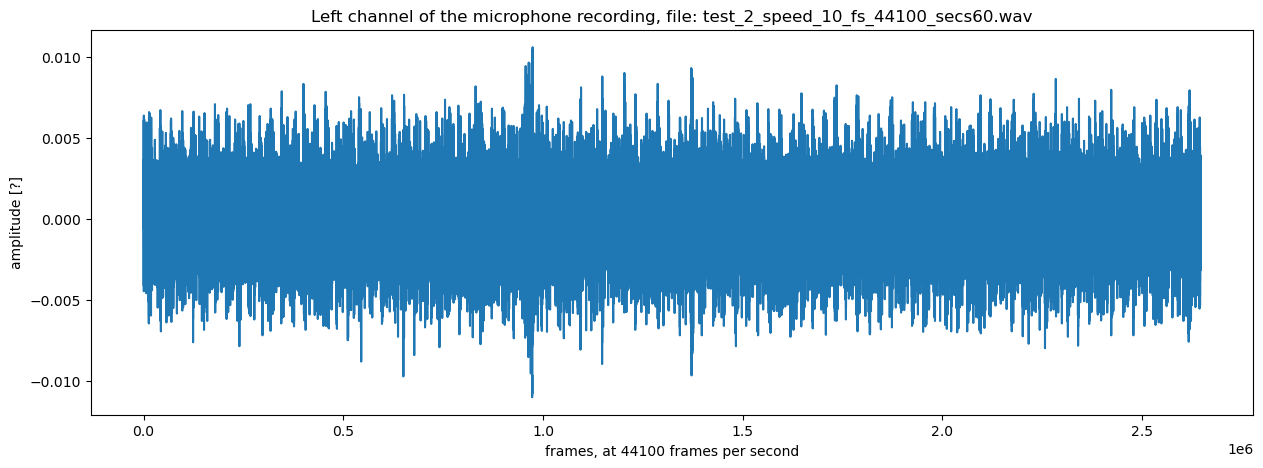

In [6]:
# plot the difference in left and right channel

plt.figure(figsize=(15,5))
plt.plot(mic_data_left[0], label='left')
plt.title('Left channel of the microphone recording, file: ' + mic_files[0])
plt.xlabel('frames, at 44100 frames per second')
plt.ylabel('amplitude [?]')
plt.show()


In [7]:
means, stds, maxs, mins, medians = split_extract_features(mic_data_left, fft_bool=False)
means_fft, stds_fft, maxs_fft, mins_fft, medians_fft = split_extract_features(mic_data_left, fft_bool=True)

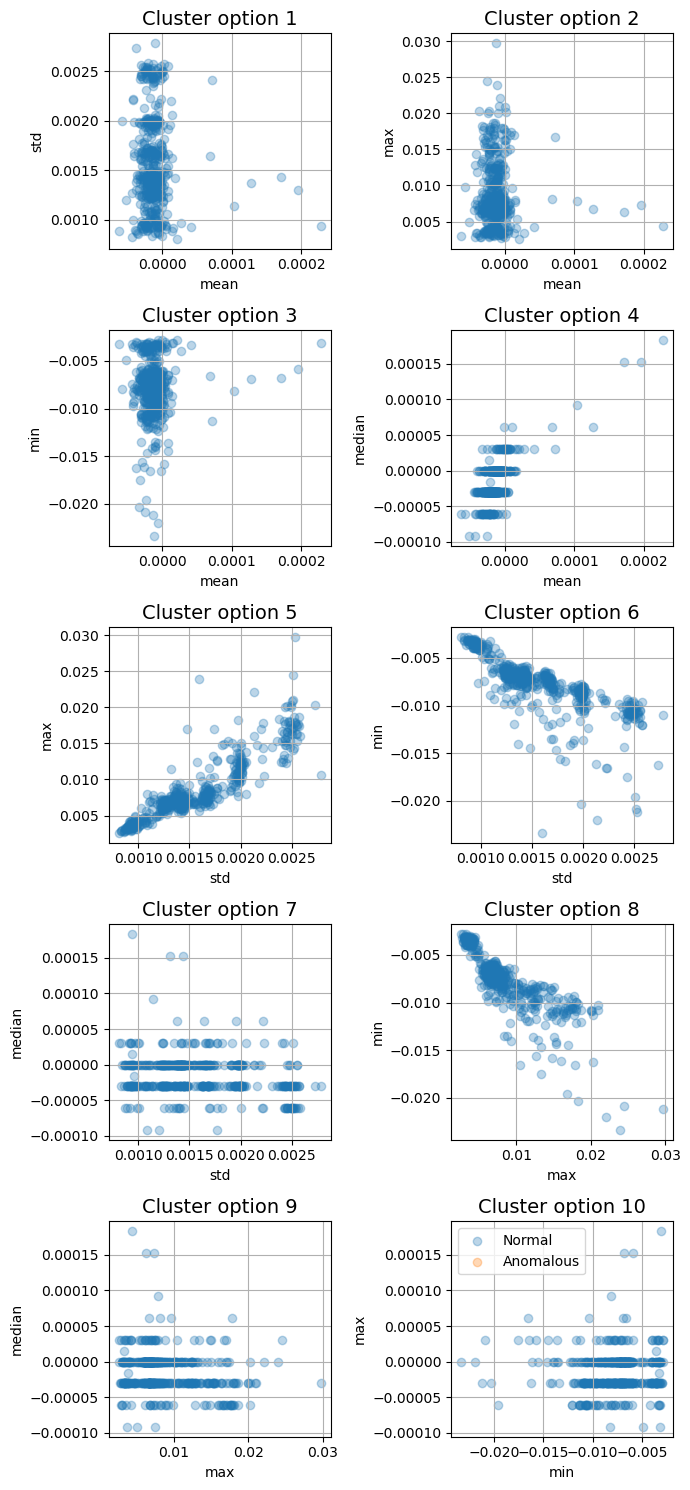

In [8]:
anom_means = []
anom_stds = []
anom_maxs = []
anom_mins = []
anom_medians = []

plot_basics(anom_means, anom_stds, anom_maxs, anom_mins, anom_medians, means, stds, maxs, mins, medians)

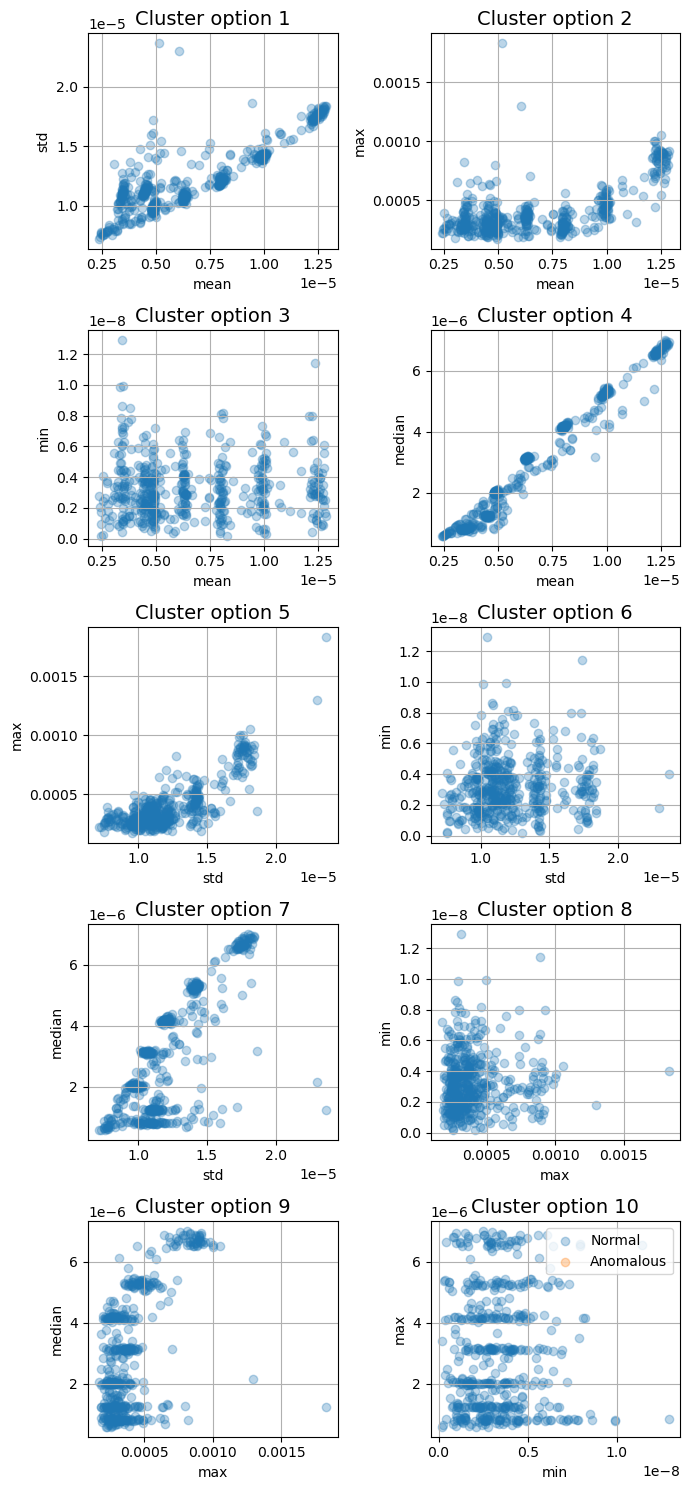

In [9]:
plot_basics(anom_means, anom_stds, anom_maxs, anom_mins, anom_medians, means_fft, stds_fft, maxs_fft, mins_fft, medians_fft)

Although no useful accelerometer data is gathered yet and therefor importing it is commented out, I will now try to plot the data for when it's available.

In [10]:
dir_acc = os.path.join("data/1_Measurem_testday_Omron/Accelerometer", "03-05_Omron")

acc_files = []
acc_time = []
acc_data = []
acc_data_fft = []

for i in os.listdir(dir_acc):
    acc_files.append(i)

    with open(dir_acc + '/' + i, 'r') as file:
        csv_data = np.asarray(list(csv.reader(file)))
        
    #samplerate, data = wavfile.read(dir_acc + '\\' + i) # for windows
    acc_time.append(csv_data[1:,0])

    data = csv_data[1:,1:4]
    acc_data.append(data)

    #also store the fft data
    data_fft_v1 = fft(data)
    data_fft = 2.0/(data.shape[0]) * np.abs(data_fft_v1[0:data.shape[0]//2])
    acc_data_fft.append(data_fft)

In [11]:
print('Example file "',acc_files[0], '" has the following format with x,y,z data:')
print(acc_data[0])

Example file " Accelerometer_Omron_test15_fs3200_secs10.csv " has the following format with x,y,z data:
[[' 0.19531' ' -0.95312' ' 0.18750 ']
 [' 0.24219' ' -0.99219' ' 0.17188 ']
 [' 0.33594' ' -1.00000' ' 0.21875 ']
 ...
 [' 0.00000' ' -1.00000' ' 0.13281 ']
 [' -0.02344' ' -1.02344' ' 0.08594 ']
 [' 0.00781' ' -0.99219' ' 0.15625 ']]


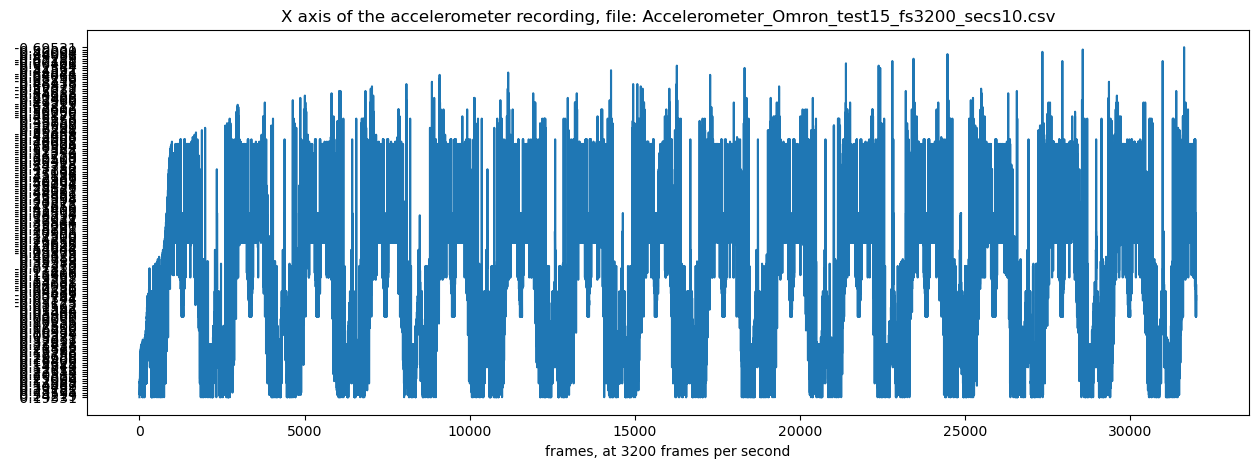

In [12]:
# plot x axis of accelerometer

plt.figure(figsize=(15,5))
plt.plot(acc_data[0][:,0], label='x')
plt.title('X axis of the accelerometer recording, file: ' + acc_files[0])
plt.xlabel('frames, at 3200 frames per second')
plt.show()

Text(0.5, 0, 'frames, at 3200 frames per second')

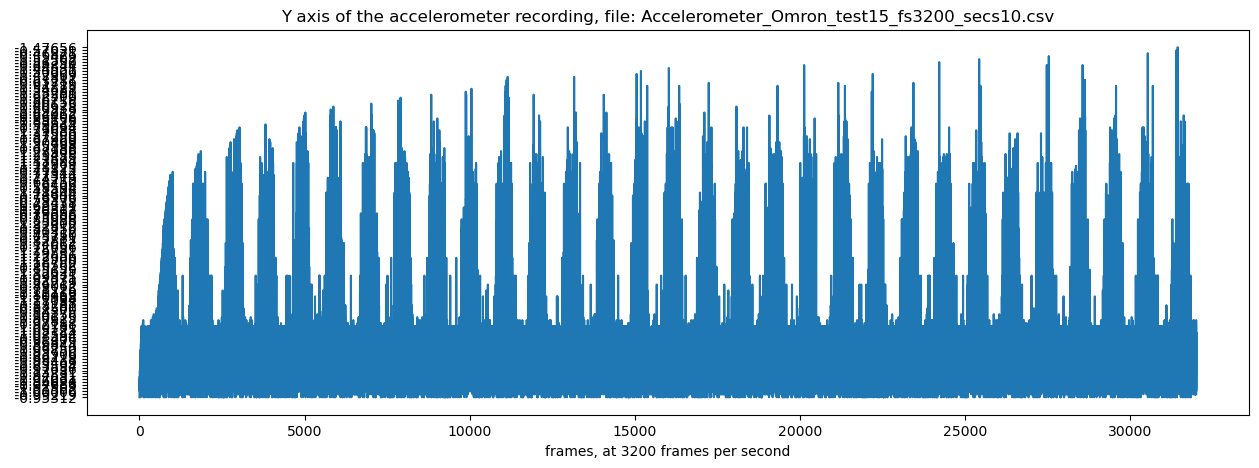

In [13]:
# plot y axis of accelerometer
plt.figure(figsize=(15,5))
plt.plot(acc_data[0][:,1], label='x')
plt.title('Y axis of the accelerometer recording, file: ' + acc_files[0])
plt.xlabel('frames, at 3200 frames per second')

Text(0.5, 0, 'frames, at 3200 frames per second')

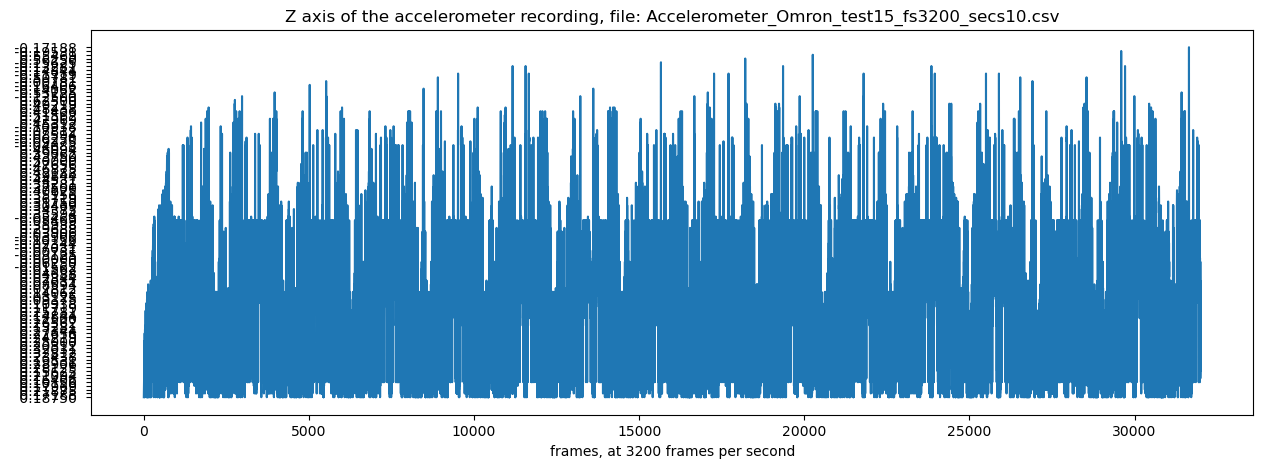

In [14]:
# plot z axis of accelerometer
plt.figure(figsize=(15,5))
plt.plot(acc_data[0][:,2], label='x')
plt.title('Z axis of the accelerometer recording, file: ' + acc_files[0])
plt.xlabel('frames, at 3200 frames per second')

In [32]:
# split data into matrices for every axis and convert to float

acc_data_x = []
acc_data_y = []
acc_data_z = []

for i in range(len(acc_data)):
    acc_data_x.append(acc_data[i][:,0].astype(float))
    acc_data_y.append(acc_data[i][:,1].astype(float))
    acc_data_z.append(acc_data[i][:,2].astype(float))

In [42]:
means_x, stds_x, maxs_x, mins_x, medians_x = split_extract_features(acc_data_x, fft_bool=False)
means_y, stds_y, maxs_y, mins_y, medians_y = split_extract_features(acc_data_y, fft_bool=False)
means_z, stds_z, maxs_z, mins_z, medians_z = split_extract_features(acc_data_z, fft_bool=False)

means_x_fft, stds_x_fft, maxs_x_fft, mins_x_fft, medians_x_fft = split_extract_features(acc_data_x, fft_bool=True)
means_y_fft, stds_y_fft, maxs_y_fft, mins_y_fft, medians_y_fft = split_extract_features(acc_data_y, fft_bool=True)
means_z_fft, stds_z_fft, maxs_z_fft, mins_z_fft, medians_z_fft = split_extract_features(acc_data_z, fft_bool=True)

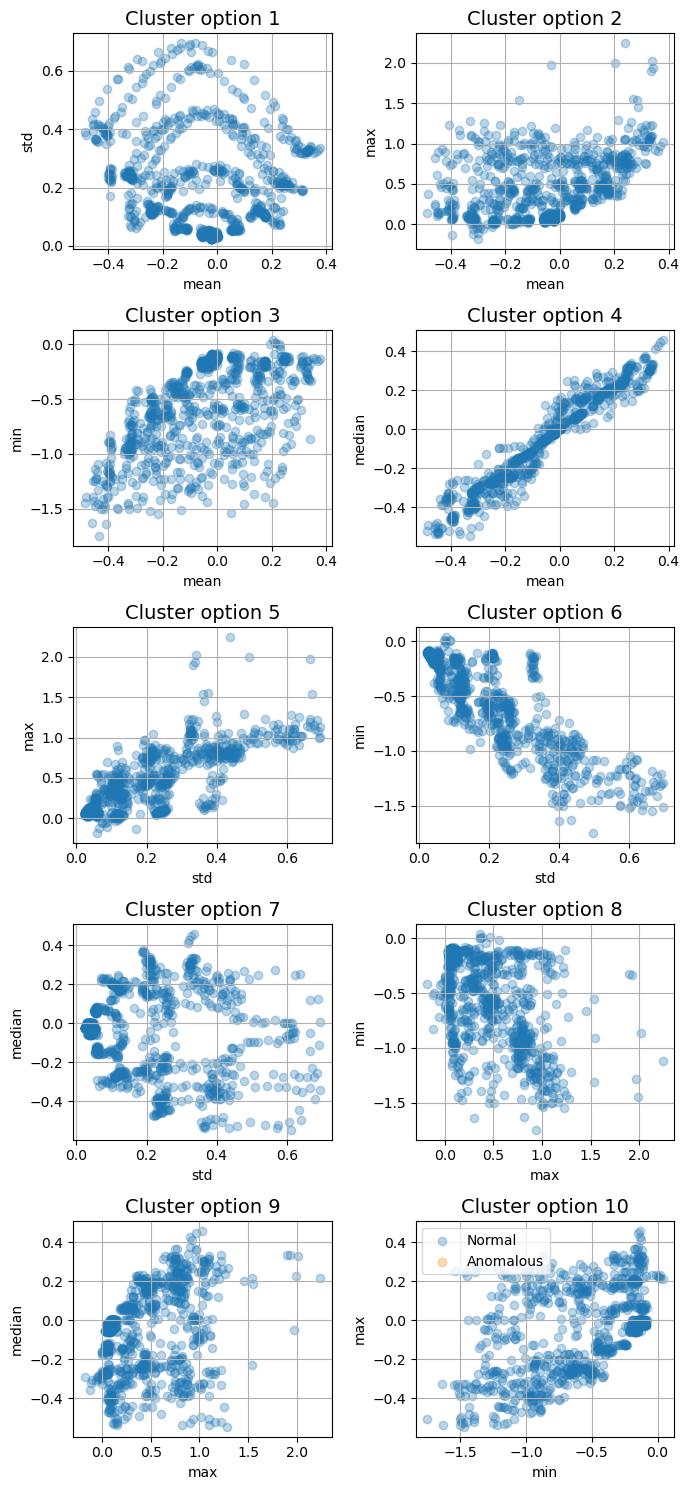

In [37]:
plot_basics(anom_means, anom_stds, anom_maxs, anom_mins, anom_medians, means_x, stds_x, maxs_x, mins_x, medians_x)

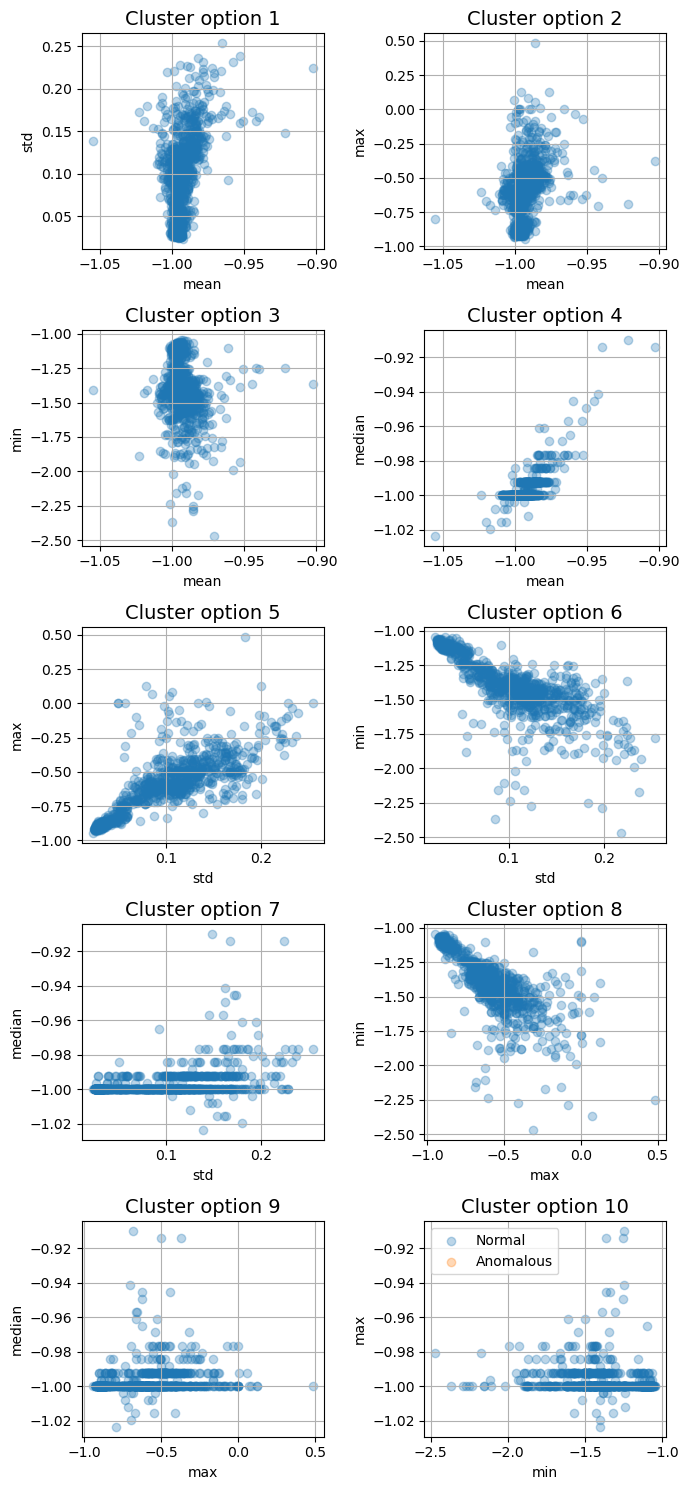

In [38]:
plot_basics(anom_means, anom_stds, anom_maxs, anom_mins, anom_medians, means_y, stds_y, maxs_y, mins_y, medians_y)

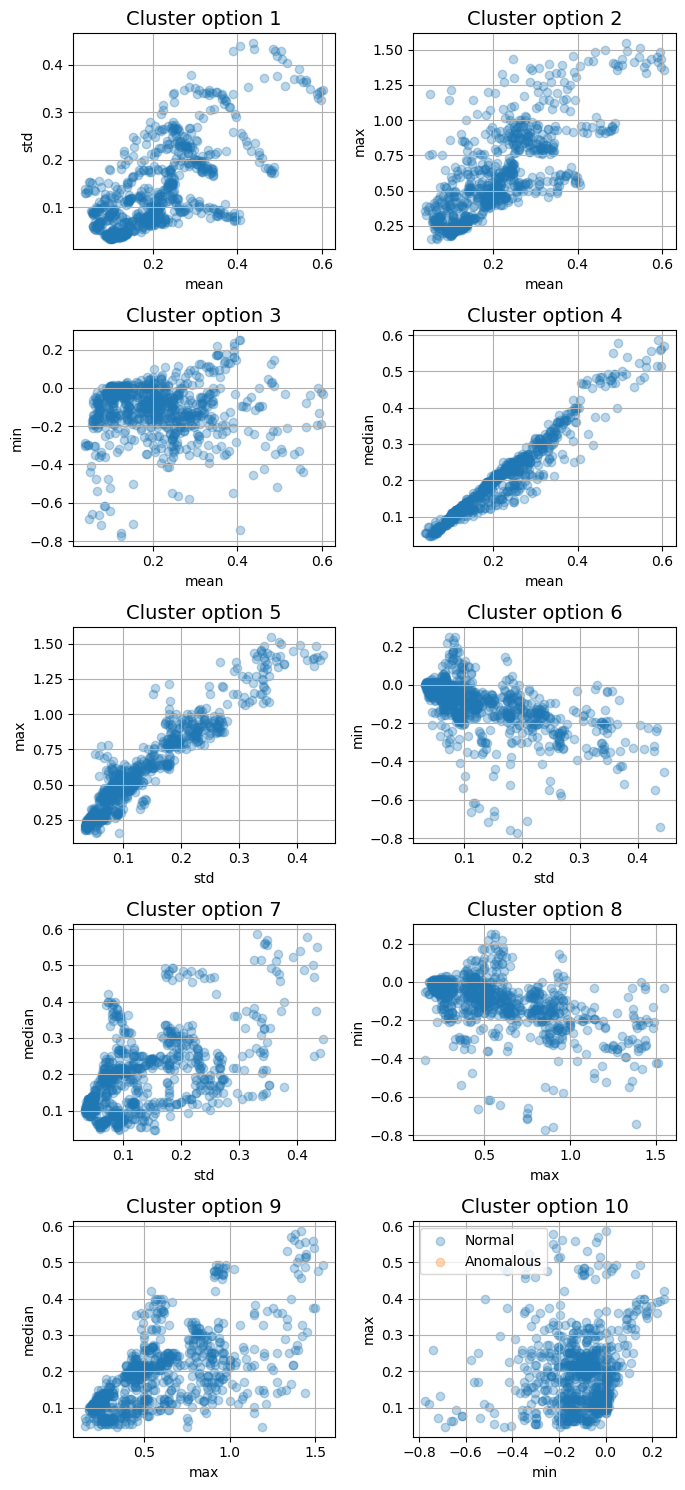

In [39]:
plot_basics(anom_means, anom_stds, anom_maxs, anom_mins, anom_medians, means_z, stds_z, maxs_z, mins_z, medians_z)

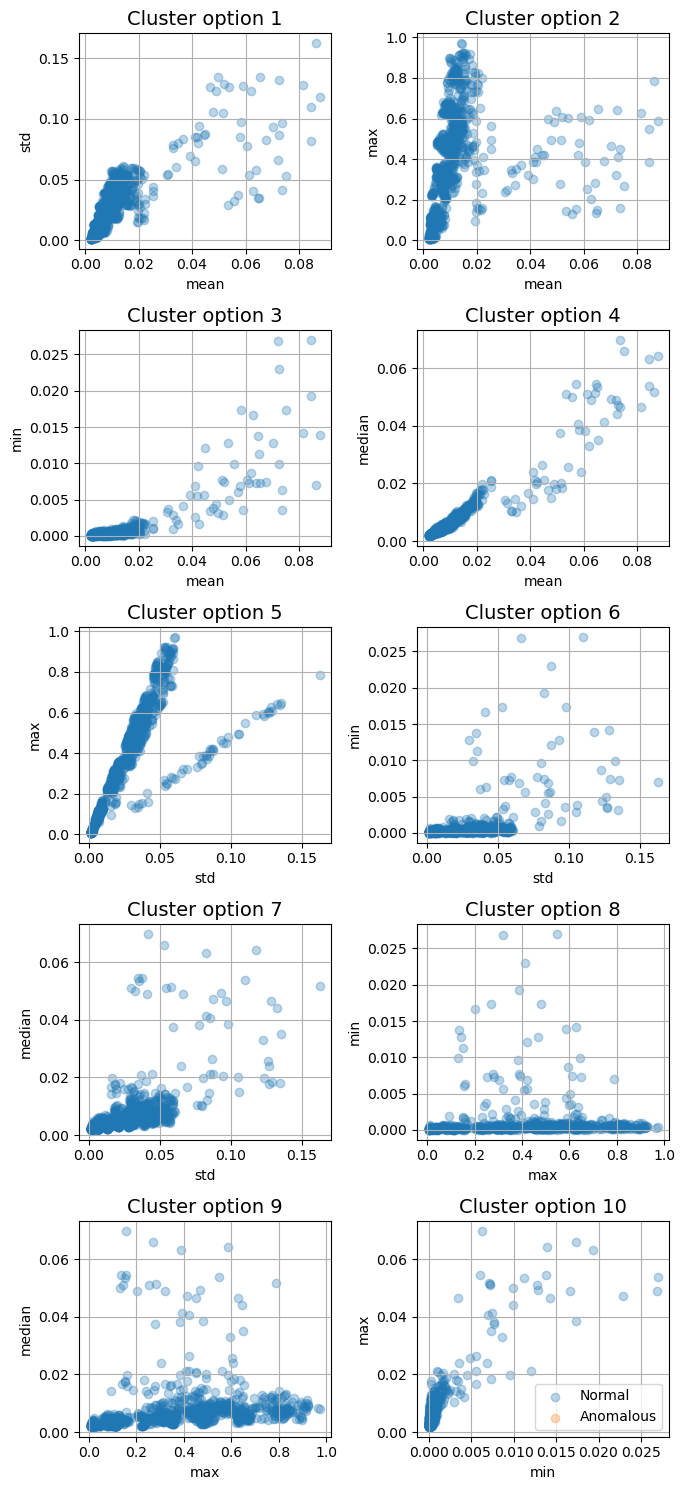

In [43]:
plot_basics(anom_means, anom_stds, anom_maxs, anom_mins, anom_medians, means_x_fft, stds_x_fft, maxs_x_fft, mins_x_fft, medians_x_fft)

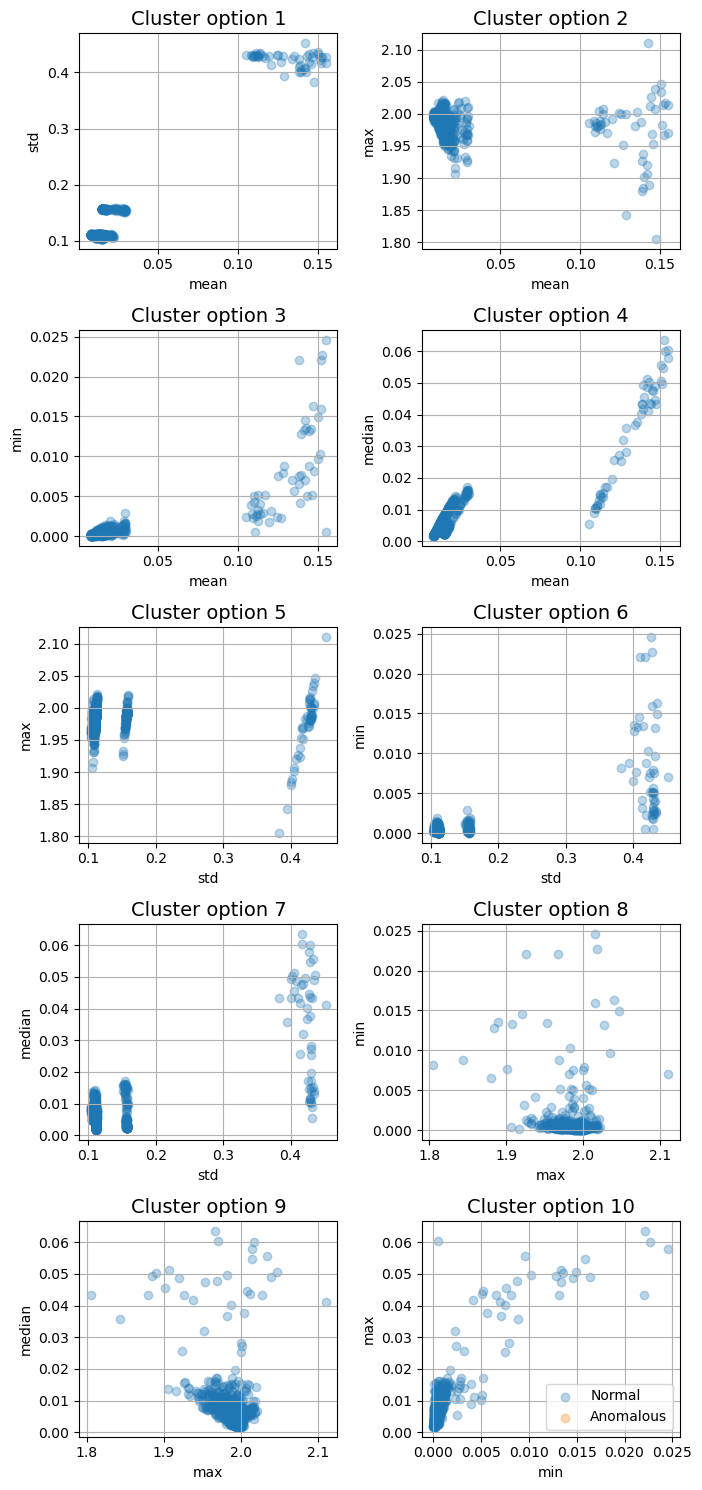

In [44]:
plot_basics(anom_means, anom_stds, anom_maxs, anom_mins, anom_medians, means_y_fft, stds_y_fft, maxs_y_fft, mins_y_fft, medians_y_fft)

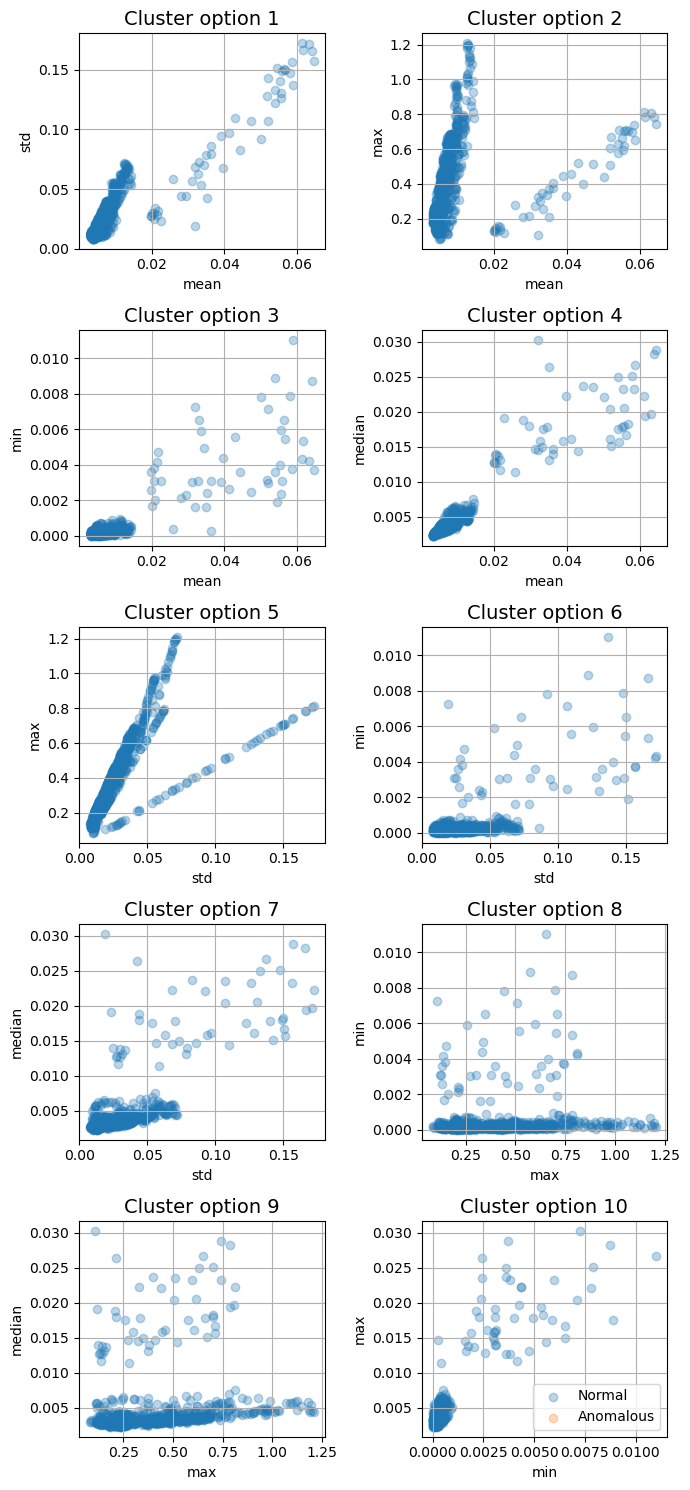

In [45]:
plot_basics(anom_means, anom_stds, anom_maxs, anom_mins, anom_medians, means_z_fft, stds_z_fft, maxs_z_fft, mins_z_fft, medians_z_fft)